## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
merge_df = pd.merge(left = study_results, right = mouse_metadata, on = "Mouse ID", how = "outer")
# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
mouse_df = merge_df.groupby("Mouse ID")
len(mouse_df)

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_df = merge_df.sort_values(["Mouse ID", "Timepoint"])
mice_df["Next ID"] = mice_df["Mouse ID"].shift(-1)
mice_df["Next Time"] = mice_df["Timepoint"].shift(-1)
mice_df["Duplicate"] = (mice_df["Mouse ID"] == mice_df["Next ID"]) & (mice_df["Timepoint"] == mice_df["Next Time"])
duplicate = mice_df.loc[mice_df["Duplicate"] == True, :]
duplicate["Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df.loc[merge_df["Mouse ID"] == "g989", :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
updated_df = merge_df.loc[merge_df["Mouse ID"] != "g989", :]
updated_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_df = updated_df.groupby("Mouse ID")
len(mouse_df)

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug = merge_df.groupby("Drug Regimen")
drug_df = pd.DataFrame(index = (drug.count().index))
drug_df["Mean Tumor Volume"] = drug["Tumor Volume (mm3)"].mean()
drug_df["Median Tumor Volume"] = drug["Tumor Volume (mm3)"].median()
drug_df["Tumor Volume Variance"] = drug["Tumor Volume (mm3)"].var()
drug_df["Tumor Volume Std. Dev."] = drug["Tumor Volume (mm3)"].std()
drug_df["Tumor Volume Std. Err."] = drug["Tumor Volume (mm3)"].sem()
drug_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

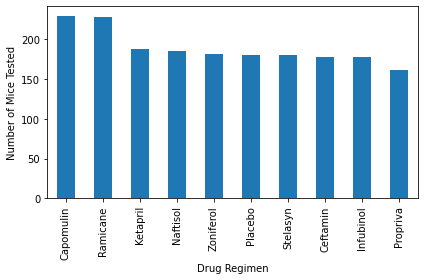

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_count = drug["Timepoint"].count()
drug_sort = drug_count.sort_values(ascending = False)
drug_sort.plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()

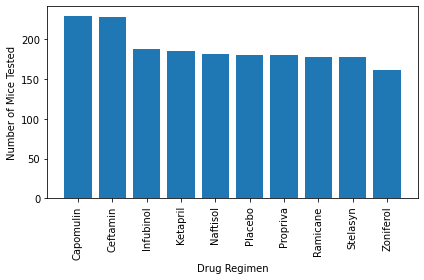

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_count = drug["Timepoint"].count()
drug_sort = drug_count.sort_values(ascending = False)
plt.bar(drug_df.index, drug_sort)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation = "vertical")
plt.tight_layout()

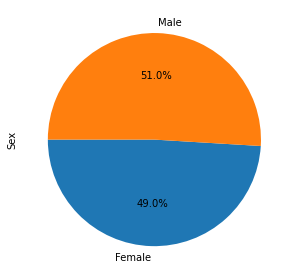

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = updated_df.groupby("Sex")
sex_df = sex["Sex"].count()
sex_df.plot.pie(autopct='%1.1f%%', startangle=180)
plt.tight_layout()

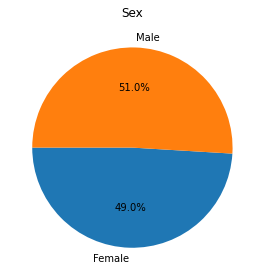

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = updated_df.groupby("Sex")
sex_df = sex["Sex"].count()
plt.pie(sex_df, autopct='%1.1f%%', startangle=180, labels = ["Female", "Male"])
plt.title("Sex")
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
final_volume = updated_df.groupby(["Mouse ID"])
last_timepoint = final_volume["Timepoint"].max()
last_timepoint_df = pd.DataFrame(index = (final_volume.count().index))
last_timepoint_df["Final Timepoint"] = last_timepoint
final_merge = pd.merge(left = updated_df, right = last_timepoint_df, on = "Mouse ID", how = "outer")
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor = final_merge.loc[final_merge["Final Timepoint"] == final_merge["Timepoint"], :]
#tumor_group = tumor.groupby("Mouse ID")
#tumor_group["Tumor Volume (mm3)"].unique()

Mouse ID
a203    [67.97341878]
a251    [65.52574285]
a262    [70.71762058]
a275    [62.99935619]
a366    [63.44068627]
            ...      
z435    [48.71066147]
z578    [30.63869575]
z581    [62.75445141]
z795    [65.74107029]
z969    [73.86784476]
Name: Tumor Volume (mm3), Length: 248, dtype: object

In [54]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    mice = tumor.loc[tumor["Drug Regimen"] == treatment, :]
    mice_group = mice.groupby("Mouse ID")
    treatment_tumorData = mice_group["Tumor Volume (mm3)"].unique()
    tumor_data.append(treatment_tumorData)
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_tumorData.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = []
    for x in treatment_tumorData:
        if ((x > upper_bound) | (x < lower_bound)):
            outlier.append(x)
    print(f"{treatment}s potential outlier: {outlier}")

Capomulins potential outlier: []
Ramicanes potential outlier: []
Infubinols potential outlier: [array([36.3213458])]
Ceftamins potential outlier: []


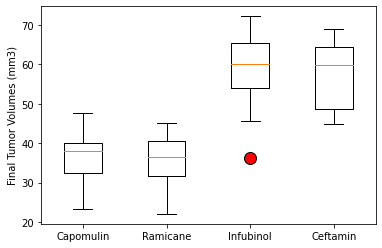

In [67]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volumes (mm3)')
flierprops = dict(markerfacecolor='r', markersize=12)
ax1.boxplot(tumor_data, labels = treatments, flierprops = flierprops)
plt.show()


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
